# Пьедесталы¶

In [7]:
!date
!pwd

Чт янв 10 15:53:54 MSK 2019
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/spectrums


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

In [6]:
''' чтение коэффициентов для учета напряжения для событий '''

data = pd.read_csv('I_coef.csv', index_col=None)
print(len(data))
data.tail()

2122


,EID,I_coef
2117,28499,1.000000
2118,28501,1.000000
2119,28783,0.971455
2120,28785,0.971455
2121,28787,0.971455


## Чтение одного события 

In [8]:
filename = '../data.txt/23001.txt'

try:
    frame = pd.read_csv(filename, header = None, index_col=0, sep='\s+', 
                        skiprows = 45, nrows = 800)
    print(frame.shape)

    off = [38, 39, 42, 43, 46, 47, 50, 51, 54, 55, 58, 59, 62, 63, 64]
    frame = frame.drop(columns = [x for x in off])
    frame = frame.drop(columns = [x for x in range(65,113)])

    print(frame.shape)

except Exception as e:
    errormsg = e.args[0]
    #errortype = errormsg.split('.')[0].strip()
    print(errormsg)
   
frame.tail()

(800, 112)
(800, 49)


,1,2,3,4,5,6,7,8,9,10,...,44,45,48,49,52,53,56,57,60,61
0,,,,,,,,,,,,,,,,,,,,,
805,51,48,64,44,42,61,45,48,47,49,...,62,52,53,46,50,48,56,37,51,50
806,59,43,59,58,47,41,54,42,46,44,...,47,51,39,65,48,45,47,41,44,48
807,49,42,52,59,52,44,52,43,48,54,...,48,46,39,54,45,56,55,40,54,46
808,50,53,55,55,60,38,44,45,48,52,...,56,46,40,75,55,54,49,44,44,42
809,49,53,54,47,52,38,45,44,58,50,...,54,56,46,92,53,52,58,65,53,51


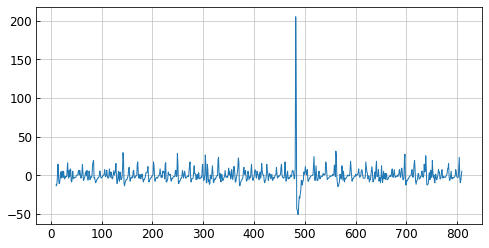

In [12]:
''' импульс в одном канале '''
plt.plot(frame[21]-frame[21][30:300].mean())
plt.grid();
#//21/22/41

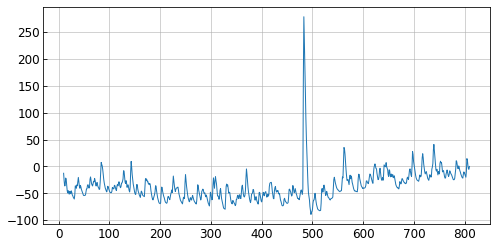

In [10]:
plt.plot(np.cumsum(frame[21]-frame[21].mean()))
plt.grid();

## Пьедесталы

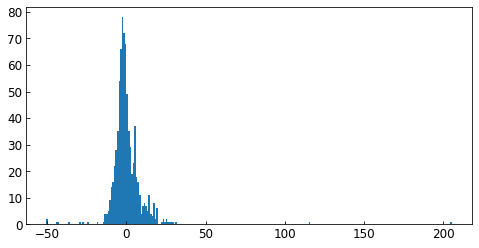

In [13]:
''' распределение всех амплитуд в канале '''
histss = plt.hist(frame[21]-frame[21][30:350].mean(), bins=258)

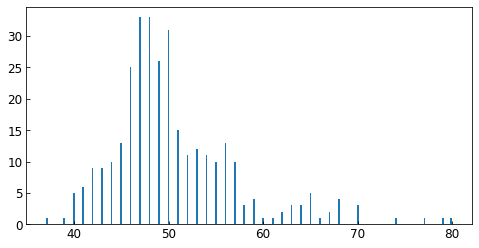

In [14]:
plt.hist(frame[21][30:350], bins=257);

In [19]:
''' пьедестал как среднее значение до триггера'''
n = 41
print(frame[n][30:300].mean(), '+-', frame[n][30:300].std())
print(frame[n][30:350].mean(), '+-', frame[n][30:350].std())
print(frame[n][30:400].mean(), '+-', frame[n][30:400].std())
print(frame[n][30:450].mean(), '+-', frame[n][30:450].std())

50.388888888888886 +- 7.680460087932861
50.5125 +- 7.3471786750261305
50.502702702702706 +- 7.434719929242799
50.516666666666666 +- 7.576953395170482


average= 50.590625
max =    48
0.0525531712574


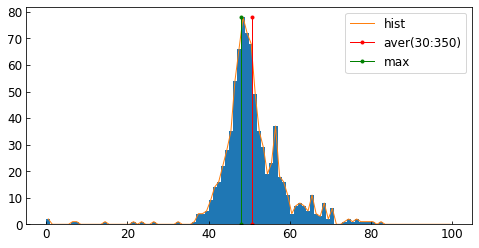

In [20]:
''' пьедестал как максимум распределения в кадре'''
n = 21
binnum = 100
histp = plt.hist(frame[n], bins=np.arange(0, binnum+1, 1))
plt.plot(histp[1][1:]-0.5,histp[0], label = 'hist')

# average
x = frame[n][30:350].mean()
print('average=', x)
plt.plot((x,x),(0,histp[0].max()), 'ro-', label = 'aver(30:350)')

# max
x1 = histp[0].argmax()
print('max =   ', x1)
plt.plot((x1,x1),(0,histp[0].max()), 'go-', label = 'max')
plt.legend()
print(2*(x-x1)/(x+x1))

In [21]:
bmax = histp[0].max()
print('max=', bmax, 'in bin:',histp[0].argmax())
#histp

max= 78.0 in bin: 48


1 average= 51.0375 max =    49 eps:= 0.0407347244783
2 average= 49.934375 max =    47 eps:= 0.0605435378317
3 average= 51.375 max =    48 eps:= 0.0679245283019
4 average= 49.2875 max =    48 eps:= 0.0264679429526
5 average= 49.871875 max =    49 eps:= 0.0176364613294
6 average= 49.9375 max =    47 eps:= 0.0606060606061
7 average= 49.878125 max =    46 eps:= 0.0808969720674
8 average= 49.659375 max =    48 eps:= 0.0339829125468
9 average= 50.6375 max =    48 eps:= 0.0534786465594
10 average= 49.171875 max =    45 eps:= 0.0886012941762
11 average= 50.1375 max =    45 eps:= 0.108001576665
12 average= 49.6625 max =    47 eps:= 0.0550885814044
13 average= 51.29375 max =    50 eps:= 0.025544517801
14 average= 51.48125 max =    48 eps:= 0.0699880630772
15 average= 50.30625 max =    47 eps:= 0.0679555527009
16 average= 49.9125 max =    47 eps:= 0.0601057655101
17 average= 50.80625 max =    48 eps:= 0.0568030868493
18 average= 49.578125 max =    48 eps:= 0.0323458767014
19 average= 48.459375 ma

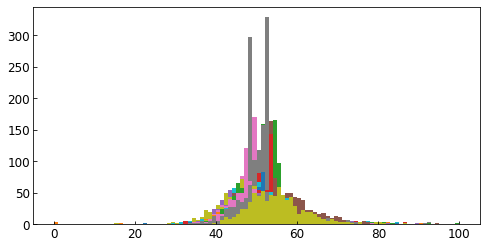

In [23]:
%%time
''' отличие среднего от максимума '''
for n in frame.columns:
    #n = 21
    histp = plt.hist(frame[n], bins=np.arange(0, binnum+1, 1))
    x = frame[n][30:350].mean()
    x1 = histp[0].argmax()
    print(n,'average=', x, 'max =   ', x1, 'eps:=', 2*(x-x1)/(x+x1))

### Четный - нечетный каналы

aver = 52.29 +- 6.92 max = 51.00, 2.49%
aver = 50.64 +- 6.73 max = 50.00, 1.28%
aver = 51.05 +- 8.07 max = 48.00, 6.16%
aver = 51.25 +- 8.71 max = 48.00, 6.55%
aver = 48.56 +- 8.09 max = 45.00, 7.62%
aver = 49.19 +- 8.16 max = 46.00, 6.70%
aver = 49.67 +- 7.28 max = 46.00, 7.68%
aver = 50.89 +- 9.71 max = 50.00, 1.76%
aver = 49.81 +- 7.75 max = 48.00, 3.71%
aver = 46.43 +- 7.65 max = 44.00, 5.38%
aver = 47.37 +- 7.49 max = 45.00, 5.13%
aver = 48.49 +- 8.12 max = 47.00, 3.13%
aver = 50.70 +- 6.80 max = 48.00, 5.47%
aver = 51.99 +- 7.47 max = 48.00, 7.98%
aver = 49.40 +- 6.61 max = 46.00, 7.13%
aver = 51.25 +- 8.71 max = 50.00, 2.47%
aver = 49.84 +- 7.78 max = 48.00, 3.76%
aver = 52.40 +- 8.16 max = 48.00, 8.76%
aver = 43.33 +- 7.58 max = 42.00, 3.12%
aver = 52.76 +- 6.94 max = 51.00, 3.40%
aver = 50.76 +- 7.19 max = 50.00, 1.50%
aver = 47.22 +- 6.58 max = 46.00, 2.61%
aver = 51.26 +- 2.30 max = 51.00, 0.50%
aver = 51.01 +- 8.25 max = 48.00, 6.07%
aver = 44.76 +- 6.09 max = 43.00, 4.00%


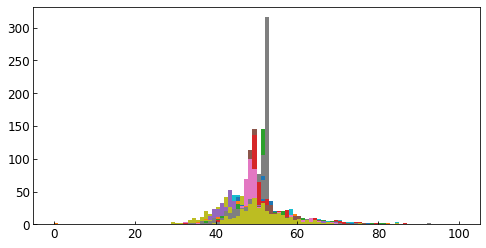

In [34]:
%%time
''' отличие среднего от максимума четный'''

for n in frame.columns:
    #n = 21
    histp = plt.hist(frame[n][30::2], bins=np.arange(0, binnum+1, 1))
    x = frame[n][30:350:2].mean()
    sigx = frame[n][30:350:2].std()
    x1 = histp[0].argmax()
    print('aver = {:.2f} +- {:.2f} max = {:.2f}, {:.2%}'.format(x, sigx, x1, 2*(x-x1)/(x+x1)) )

In [29]:
'''  '''
def show_pied(startx, step):
    n = 19 #33
    binnum = 100
    #startx = 30
    stopx = 350
    histp = plt.hist(frame[n][startx:     :step], bins=np.arange(0, binnum+1, 1))
    histp = plt.hist(frame[n][startx:stopx:step], bins=np.arange(0, binnum+1, 1))
    plt.plot(histp[1][1:]-0.5,histp[0], label = 'hist')

    # average
    x = frame[n][startx:stopx:step].mean()
    plt.plot((x,x),(0,histp[0].max()), 'ro-', label = 'aver(30:350)')
    # median
    xm = frame[n][startx:stopx:step].median()
    plt.plot((xm,xm),(0,histp[0].max()), 'mx-', label = 'mediana(30:350)')

    # max
    x1 = histp[0].argmax()
    plt.plot((x1,x1),(0,histp[0].max()), 'go-', label = 'max')
    plt.legend()
    print('average=', x, ', max =  ', x1, ', median= ',xm, ', ', 2*(x-x1)/(x+x1), sep='')

average=48.459375, max =  42, median= 48.5, 0.142812726707


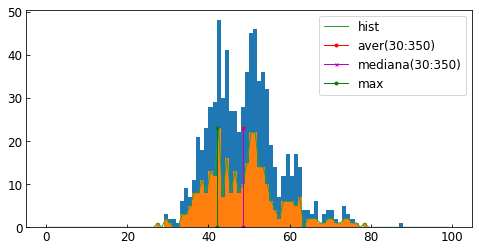

In [30]:
show_pied(30, 1)

average=43.33125, max =  42, median= 42.0, 0.031201933641


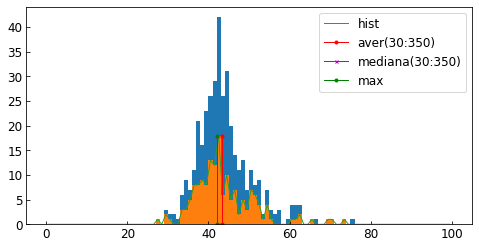

In [35]:
show_pied(30, 2)

average=53.5875, max =  51, median= 52.0, 0.0494801003944


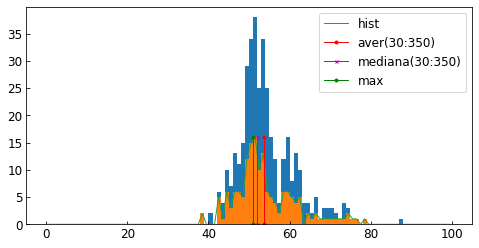

In [36]:
show_pied(31, 2)

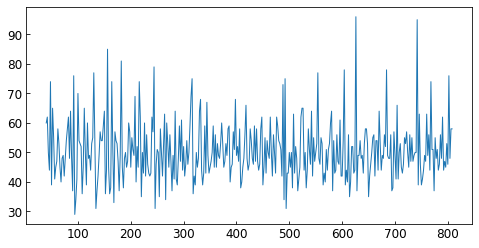

In [351]:
histp = plt.plot(frame[n][startx::2])

### Расчет всех пьедесталов

Считаем пьедесталы отдельно для четных и нечетных бинов как медиану соответствующих амплитуд (четных или нечетных) в диапазоне от 30 до 350. Сохраняем пьедесталы в отдельный файл.

In [37]:
pied = data[['EID','I_coef']]
pied.shape

(2122, 2)

In [38]:
def read_data_file(filename):
    try:
        frame = pd.read_csv(filename, header = None, index_col=0, sep='\s+', 
                            skiprows = 45, nrows = 800)

        off = [38, 39, 42, 43, 46, 47, 50, 51, 54, 55, 58, 59, 62, 63, 64]
        frame = frame.drop(columns = [x for x in off])
        frame = frame.drop(columns = [x for x in range(65,113)])
        return frame

    except Exception as e:
        errormsg = e.args[0]
        #errortype = errormsg.split('.')[0].strip()
        print(errormsg)
        return 'NULL'

In [39]:
%%time
''' Вычисление пьедесталов '''
dirname = '../data.txt/'
startx = 30
stopx  = 350
step = 2
for i in range(pied.shape[0]):
    filename = dirname + str(pied.loc[i, 'EID']) + '.txt'
    if i%100 == 1: 
        print(i, end=' ')
    try:
        frame = read_data_file(filename) 
    except:
        continue
    for n in frame.columns: 
        pied.loc[i, 'p0_'+str(n)] = frame[n][startx  :stopx:step].median()
        pied.loc[i, 'p1_'+str(n)] = frame[n][startx+1:stopx:step].median()

1 101 201 301 401 501 601 701 801 901 1001 1101 1201 1301 1401 1501 1601 1701 1801 1901 2001 2101 CPU times: user 2min 36s, sys: 3.33 s, total: 2min 39s
Wall time: 2min 59s


In [40]:
pied[210:215]

,EID,I_coef,p0_1,p1_1,p0_2,p1_2,p0_3,p1_3,p0_4,p1_4,...,p0_53,p1_53,p0_56,p1_56,p0_57,p1_57,p0_60,p1_60,p0_61,p1_61
210,23457,1.0,50.0,48.0,49.0,47.0,49.0,51.0,48.5,46.0,...,48.0,54.5,51.0,59.0,48.0,48.0,47.5,52.0,49.0,56.0
211,23459,1.0,51.0,48.0,49.0,47.0,49.5,50.0,49.0,46.0,...,49.0,55.0,51.0,60.0,48.5,47.0,47.0,51.0,50.0,56.0
212,23509,1.0,50.0,48.5,50.0,47.0,50.0,49.0,49.0,46.0,...,49.0,54.0,51.0,59.0,49.0,48.0,47.5,52.0,50.0,56.0
213,23511,1.0,50.0,48.0,49.0,47.0,49.0,49.5,49.5,45.0,...,49.0,55.0,51.0,59.5,49.0,48.0,47.0,52.0,50.0,56.0
214,23513,1.0,50.0,49.0,49.0,47.0,49.0,50.0,50.0,46.0,...,48.0,54.5,51.0,59.0,49.0,48.0,47.0,52.0,50.5,57.0


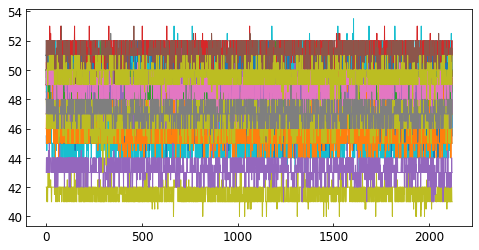

In [41]:
param = pied.columns
param = param[2::2]
for n in param:
    plt.plot(pied[n])

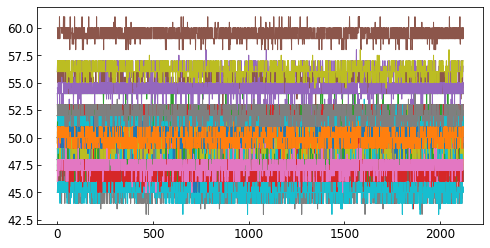

In [42]:
param = pied.columns
param = param[3::2]
for n in param:
    plt.plot(pied[n])

In [47]:
pied.to_csv('piedestal01.csv')

## Оценка максимального значение амплитуды 

In [43]:
%%time
''' оценка максимального значения амплитуды в канале во всех событиях '''

maximum = 0
for i in range(data.shape[0]):
    filename = dirname + str(data.EID[i]) + '.txt'
    frame = read_data_file(filename) 
    
    for n in frame.columns: 
        if maximum < frame[n].max():
            maximum = frame[n].max()
            maxname = [filename, n]
            
print(maximum, maxname)

896 ['../data.txt/23017.txt', 5]
CPU times: user 46.9 s, sys: 2.85 s, total: 49.8 s
Wall time: 49.8 s


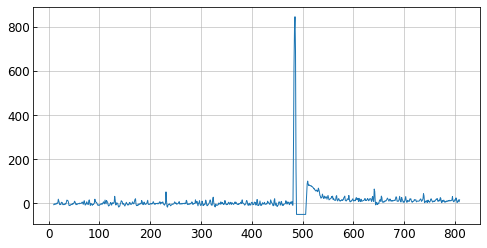

In [44]:
''' проверка канала с максимальной амплитудой '''
filename = '../data.txt/23017.txt'
n=5
frame = read_data_file(filename) 
plt.plot(frame[n]-frame[n][30:300].mean())
plt.grid();

In [45]:
%%time
''' оценка максимального значения амплитуды в канале во всех событиях 
с учетом пьедесталов и поправки на высокое '''

maximum = 0
for i in range(data.shape[0]):
    filename = dirname + str(data.EID[i]) + '.txt'
    frame = read_data_file(filename) 
    
    for n in frame.columns:
        for p in range(2):
            datum = frame[n][30::2] - pied.loc[i, 'p'+str(p)+'_'+str(n)] 
            if (data.loc[i, 'I_coef'] != 1.0):
                datum = datum * data.loc[i, 'I_coef']
            if maximum < datum.max():
                maximum = datum.max()
                maxname = [filename, n]
            
print(maximum, maxname)

1189.11311897 ['../data.txt/27095.txt', 33]
CPU times: user 1min 52s, sys: 2.63 s, total: 1min 54s
Wall time: 1min 54s


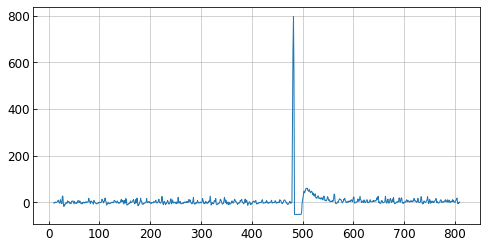

In [46]:
''' проверка канала с максимальной амплитудой '''
filename = '../data.txt/27095.txt'
frame = read_data_file(filename) 
plt.plot(frame[33]-frame[33][30:300].mean())
plt.grid();

## Спектр

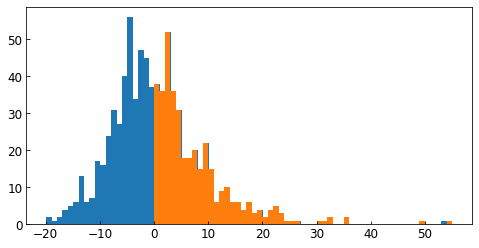

In [261]:
filename = '../data.txt/23005.txt'
frame = read_data_file(filename) 
n = 22
datum = frame[n] -  frame[n][30:350].mean()# channel n
#histss = plt.hist(frame[n]-frame[n][30:350].mean()); #, bins=np.arange(frame[n].min(), max(frame[n]) + 1, 1))
histss = plt.hist(datum, bins=np.arange(datum.min(), datum.max() + 1, 1))
histss = plt.hist(datum, bins=np.arange(0, datum.max() + 1, 1))

In [269]:
histss

(array([38., 36., 52., 36., 31., 18., 18., 20., 15., 22., 15.,  6.,  9.,
        10.,  6.,  6.,  4.,  6.,  3.,  4.,  2.,  4.,  5.,  3.,  1.,  1.,
         1.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55.]),
 <a list of 55 Patch objects>)

In [ ]:
%%time
ss = [0]*1023
for i in range(data.shape[0]):
    if i%50 == 1:
        print(i, end=' ')
    filename = dirname + str(data.EID[i]) + '.txt'
    frame = read_data_file(filename) 
    
    #for n in frame.columns: 
    chan = 22
    datum = frame[chan] - data.loc[i, 'p'+str(n)] #frame[chan][30:350].mean()# channel n
    #histss = plt.hist(frame[n]-frame[n][30:350].mean()); #, bins=np.arange(frame[n].min(), max(frame[n]) + 1, 1))
    hists = plt.hist(datum, bins=np.arange(0, 1024, 1))
    ss = ss + hists[0]

In [265]:
hh

[array([55., 57., 37., ...,  0.,  0.,  0.]),
 array([37., 54., 47., ...,  0.,  0.,  0.]),
 array([38., 36., 52., ...,  0.,  0.,  0.])]

In [282]:
ss

array([130., 147., 136., ...,   0.,   0.,   0.])